<a href="https://colab.research.google.com/github/jhuarancca/DSRP-DataArchitect/blob/main/DiagramAsCode_DataMesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instalamos la librería Diagrams
# Fuente: https://diagrams.mingrammer.com/
!pip install diagrams

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 824.7/824.7 kB 46.1 MB/s eta 0:00:00


In [ ]:
# Importamos el módulo maestro Diagram
from diagrams import Diagram

# Vendor AWS
from diagrams.aws.compute import EC2
# Vendor Azure
from diagrams.azure.storage import BlobStorage
# Vendor Google
from diagrams.gcp.analytics import BigQuery

In [ ]:
# Diagramando
with Diagram("\n Diagrama Hola Mundo") as miDiagrama:
  EC2("Mi Web en AWS")
  BlobStorage("Mis archivos en Azure  ")
  BigQuery("Mis querys en Google")
miDiagrama

In [ ]:
# Diagramando
with Diagram("\n Diagrama Hola Mundo") as miDiagrama:
  source = EC2("Mi Web en AWS")
  storage = BlobStorage("Mis archivos en Azure  ")
  query = BigQuery("Mis querys en Google")
  source >> storage >> query
miDiagrama

 Arquitectura de Datos con Azure' size too small for label


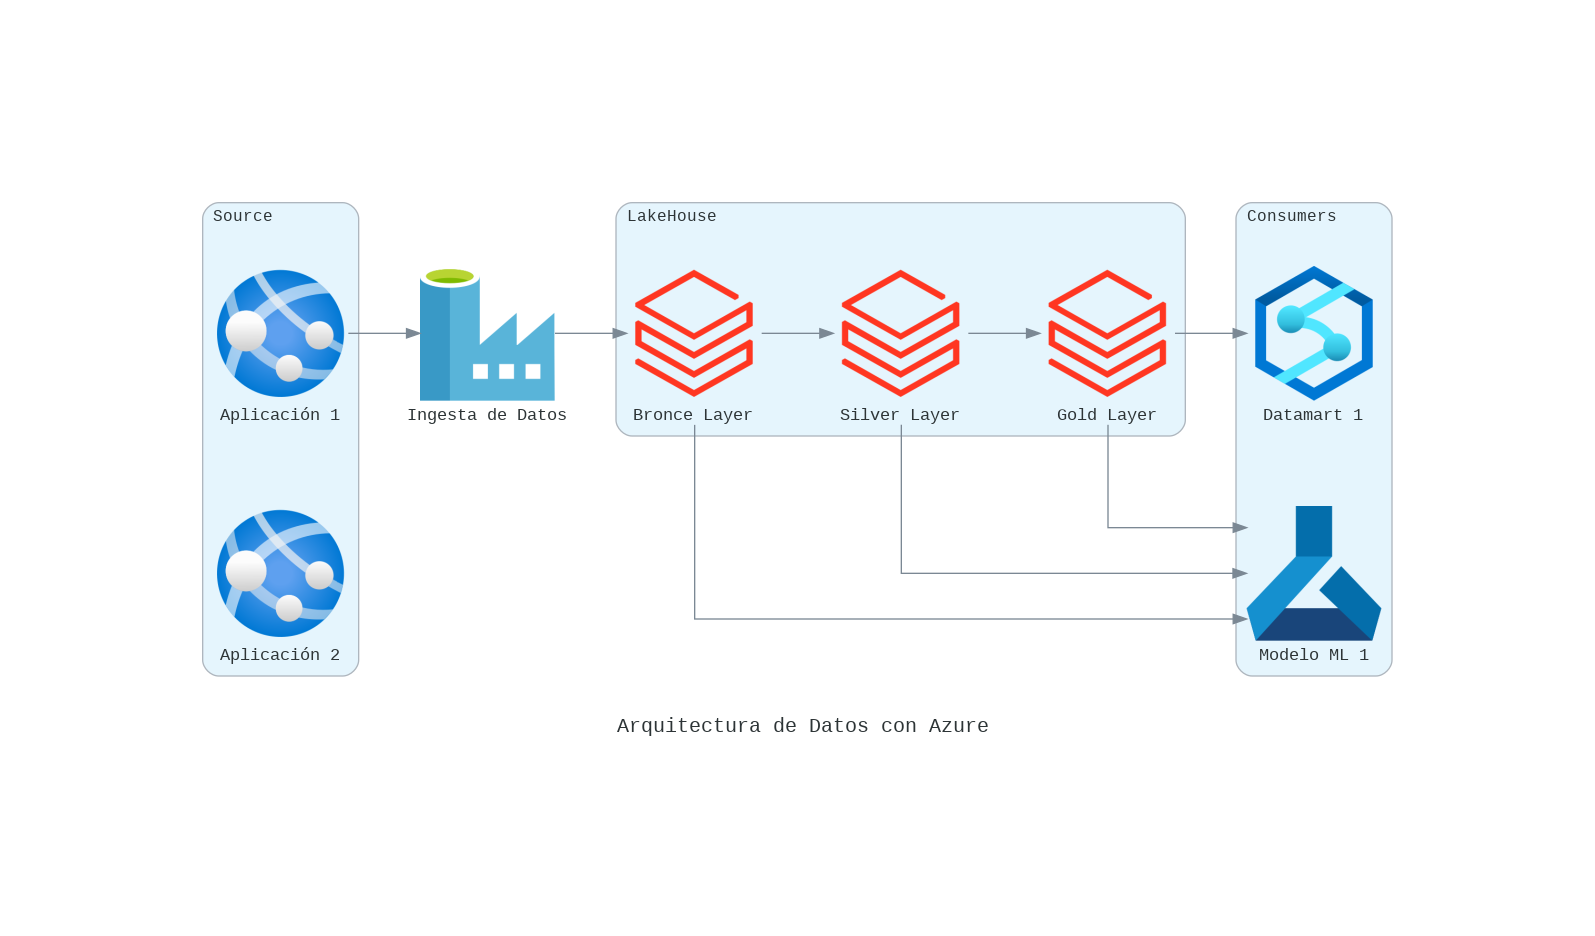

In [ ]:
# Importamos los recursos del Cloud Azure
# Fuente: https://diagrams.mingrammer.com/docs/nodes/azure

from diagrams import Diagram, Cluster
from diagrams.azure.compute import AppServices
from diagrams.azure.compute import FunctionApps
from diagrams.azure.storage import BlobStorage
from diagrams.azure.analytics import AnalysisServices
from diagrams.azure.analytics import Databricks
from diagrams.azure.analytics import DataFactories
from diagrams.azure.analytics import SynapseAnalytics
from diagrams.azure.ml import MachineLearningServiceWorkspaces

with Diagram("\n Arquitectura de Datos con Azure") as diag:
  with Cluster("Source"):
    app = AppServices("Aplicación 1")
    AppServices("Aplicación 2")

  ETL = DataFactories ("Ingesta de Datos")
  with Cluster("LakeHouse"):
    bronceLayer = Databricks("Bronce Layer")
    silverLayer = Databricks("Silver Layer")
    goldLayer = Databricks("Gold Layer")

    bronceLayer >> silverLayer >> goldLayer


  with Cluster ("Consumers"):
    dataMart = SynapseAnalytics("Datamart 1")
    ML = MachineLearningServiceWorkspaces("Modelo ML 1")
    consumers = [dataMart, ML]

  app >> ETL >> bronceLayer
  goldLayer >> dataMart
  bronceLayer >> ML
  silverLayer >> ML
  goldLayer >> ML


diag